In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing customer dataset

In [2]:
df1 = pd.read_csv("olist_customers_dataset.csv")
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df1.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [4]:
df1.shape

(99441, 5)

In [5]:
for i in df1.columns:
    print(i," Unique Values: ",len(set(df1[i])))

customer_id  Unique Values:  99441
customer_unique_id  Unique Values:  96096
customer_zip_code_prefix  Unique Values:  14994
customer_city  Unique Values:  4119
customer_state  Unique Values:  27


In [6]:
df1.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### We can understand that although there are no null values in the data set, the the number of unique values in each column is low so, we get that every customer gets a new id whenever he registers/buys onto the system but the unique id remains the same. There are only 27 states from which the orders were recieved. Now we need to look into how these states are are weighing on the purchase

In [7]:
for i in df1.columns:
    print(i," Count: ", df1[i].value_counts())

customer_id  Count:  06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: customer_id, Length: 99441, dtype: int64
customer_unique_id  Count:  8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64
cus

In [8]:
df1.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

<AxesSubplot:>

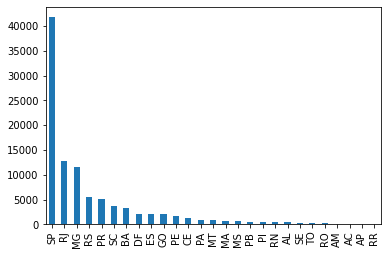

In [9]:
df1["customer_state"].value_counts().plot(kind='bar')

# Dividing customers based on the region

In [10]:
n_states = set(df1["customer_state"])
s = {"Area":[],"Number":[],"Percentage":[]}
for i in n_states:
    s["Area"].append(i)
    s["Number"].append(len(df1[df1["customer_state"]==i]))
    s["Percentage"].append(len(df1[df1["customer_state"]==i])/len(df1)*100)
    #print(f"No. and % of customers in {i}: ",len(df1[df1["customer_state"]==i]),len(df1[df1["customer_state"]==i])/len(df1)*100)

In [11]:
type(s)

dict

In [12]:
S = pd.DataFrame.from_dict(s)
S = S.sort_values(by="Number",ascending=False).reset_index(drop=True)#,columns=["state","number","percentage"]

In [13]:
S

,Area,Number,Percentage
0,SP,41746,41.980672
1,RJ,12852,12.924247
2,MG,11635,11.700405
3,RS,5466,5.496727
4,PR,5045,5.073360
5,SC,3637,3.657445
6,BA,3380,3.399000
7,DF,2140,2.152030
8,ES,2033,2.044428
9,GO,2020,2.031355


#### Almost 75% of the sales are being contributed by the first five states only so we only take those states into consideration

In [14]:
set1 = df1[df1["customer_state"]==S.loc[0]["Area"]]
set2 = df1[df1["customer_state"]==S.loc[1]["Area"]]
set3 = df1[df1["customer_state"]==S.loc[2]["Area"]]
set4 = df1[df1["customer_state"]==S.loc[3]["Area"]]
set5 = df1[df1["customer_state"]==S.loc[4]["Area"]]


In [17]:
!jupyter kernelspec list

Available kernels:
  python396jvsc74a57bd0aee8b7b246df8f9039afb4144a1f6fd8d2ca17a180786b69acc140d282b71a49    /Users/prajualpillai/Library/Jupyter/kernels/python396jvsc74a57bd0aee8b7b246df8f9039afb4144a1f6fd8d2ca17a180786b69acc140d282b71a49
  python3                                                                                  /opt/anaconda3/share/jupyter/kernels/python3
